--writing helper code to run computations and produce the relevant graphs from the data on the dataset
(some small functions and code chunks that the students can use)
--make sure that the students have some chance of writing their own code to answer those questions

# CE-157 Problem Set 3

Hey everyone! Just run the 3 cells below and continue onwards! They're just needed to run the initial code needed to run the rest of the functions in this problem set.

In [1]:
!pip install datascience

In [84]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datascience import Table
import pandas as pd
import numpy as np
import xlrd

/Users/calvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/calvin/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/calvin/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/calvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/calvin/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/calvin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in s

In [85]:
df = pd.read_excel("problem3dataset.xlsx").fillna("")
df.dropna()
new_titles, new_title = [], ""
for title in df.columns:
    for title_add in df[title][:3]:
        if title_add != "":
            new_title += (title_add + "\n")
    new_titles.append(title + "\n" + new_title)
    new_title = ""
for i in range(len(new_titles)):
    if new_titles[i][:8] == "Unnamed:":
        new_titles[i] = new_titles[i][11:]
df.columns = new_titles
df.index = ["0"] * 3 + list(df.index)[3:]
df = df.drop("0")
# df = df.replace("", 0)

t = Table().with_columns('Country', df.index.values)
for i in range(len(df.columns)):
    t = t.with_column(df.columns[i], df[df.columns[i]])

problem_set = t

#### Alright! Let's begin!

In this problem set, you will dive into some publicly available data on climate change, economic growth, and human development in an attempt to understand a little about the complex relationships between these parameters. With each chart you create, be sure to label your axes, create a chart title, and provide a simple regression line (including the R2 value). Note that you don’t need a chart legend if you only have one set of data. Remember – presentation is important! Also remember that a robust analysis would use far more in depth statistics, in particular focusing on each component of your regression model, both the size of the effect of each component as well as the significance, but for the purposes of this problem set linear regression slopes and R2 values will do.

The data is in a table named "problem_set" (Run the next cell to see what it looks like).

In [86]:
problem_set

Country,"Historical Emissions A Source: WRI, 2011 (Climate Analysis Indicators Tool v8) Cumulative CO2 emissions from energy, 1850–2007 (million tonnes)","Historical Emissions B Source: WRI, 2014 (Climate Analysis Indicators Tool 2.0) Cumulative GHG Emissions, 1990-2010 (million tonnes CO2 equivalent)","Current GHG Emissions Source: WRI, 2014 (Climate Analysis Indicators Tool 2.0) Total GHG Emissions, 2010 (million tonnes CO2 equivalent)","Current CO2 Emissions Source: IEA, 2013 (CO2 Emissions from Fuel Combustion, 2013 Highlights) CO2 emissions from fossil fuel combustion, 2011 (million tonnes)",Change from 1971–2011 (%),Change from 1990–2011 (%),"Total carbon footprint Source: Peters et al, 2011 (PNAS) Footprint of all goods and services consumed (million tonnes CO2 equivalent)",,"Source: WRI, 2014 (Climate Analysis Indicators Tool 2.0) Population 2010",GDP-PPP 2010 (Million $ (2005)),,"Total carbon footprint.1 Source: UNHDP, 2014 (Human Development Reports) HDI, 2011",HDI Change from 1990-2011 (%),"Gender Inequality Index Value, 2012","Maternal Mortality Ratio, 2010"
Afghanistan,72.4,349.34234819,24.9378183,,,,,,28397812,33595.89494,,0.371,50.81300813008131,0.712,460
Albania,227.9,143.80923995999999,6.56747754,3.872173,-0.344532062302469,-38.029952665129116,5.36655937086411,,3150143,24545.14398,,0.748,13.16187594553706,0.251,27
Algeria,2272.4,2618.807043,169.4218605,103.878773,1064.7801333794405,97.00504231144794,,,37062820,269074.5719,,0.711,26.512455516014217,0.391,97
Angola,305.3,3300.9745847,219.8435836,15.719235,845.5150510825533,291.96607483225927,,,19549124,98686.19045,,0.504,,,450
Antigua & Barbuda,16.6,14.166335613,1.203421037,,,,,,87233,1541.000517,,0.759,,,
Argentina,5894.8,6308.229589799999,359.0118969,183.564551,121.76281969580972,83.82239867862651,165.457784557464,,40374224,580427.4306,,0.81,15.54921540656207,0.38,77
Armenia,505.6,183.454326817,13.4266625,4.663286,,-77.2090896481657,6.01209693357893,,2963496,15152.61947,,0.726,15.60509554140127,0.34,30
Australia,13108.5,10252.545315800002,587.5260417,396.76749,175.2692807536658,52.59047516359997,296.955754060111,,22065300,763921.0601,,0.936,6.3636363636363695,0.115,7
Austria,4541.9,1712.9249392400002,84.2764363,68.4891,40.619967480614896,21.35376232968831,99.8307870789066,,8389771,296268.1013,,0.894,12.170639899623586,0.102,4
Azerbaijan,2323.7,1218.82671986,64.21001445,26.791025,,-51.29347774807037,30.2649660329915,,9054332,80695.56139,,0.732,,0.323,43


Note that there are missing data! (welcome to the ‘real world’). If, when your calculations, you don't exclude (i.e. delete) these, you will possibly run across some errors, and some meaningless results! (For example, if you were to try to calculate the "Per-Capita CO2 Emission from Fossil Fuel Consumption" of Afghanistan, you would get a result of zero because the emission data is missing. If you plotted this and used it to determine your linear regression, your regression would obviously be meaningless.)

<img src="error_pic.png" height='50' width='850'>

So, in order to avoid these issues, we've created a function to remove all the non-integers from the columns! The function is in the cell below.

In [87]:
def clean(x, y):
    """
    Takes in two column indices of "problem_set", x and y, in that respective order. Returns a list with two lists
    composed of the two column indices from the table "problem_set".
    """
    combined, x, y = list(zip(problem_set[x], problem_set[y])), [], []
    for pair in combined:
        if pair[0] != "" and pair[1] != "":
            x.append(pair[0])
            y.append(pair[1])
    return [x, y]

### IMPORTANT

When getting your results from the clean function, make sure to index into the 0th element ([0]) to get the x-values, and index into the 1st element([1]) to get the y-values.

For example, clean(0, 1) returns the valid data points between the first two columns in the problem_set table. If we set result to equal clean(0, 1) (result = clean(0, 1)), then we can get the x-column with result[0] and the y-column with result[1].

With the function "clean" above, you should be able to perform any graphing you may be asked to do.

When you explain your graphs below, do not describe them but instead interpret and explain them. Are there any correlations (or lack of)? Is there anything else that we may learn from the graph?

Finally, the scatter plots you are asked to create are written below using the standard convention of dependent vs. independent (i.e. “plot Y vs. X”).

### A quick tutorial on how to plot with Numpy and Matplotlib

When plotting with Numpy and Matplotlib, there are a few functions that come in quite handy:
   - Plot
   - Scatter
   
Using plot, you're able to take any two columns of a table, and plot them quite easily! For example, if I wanted to plot, I could do:

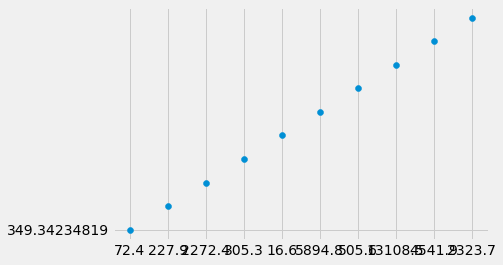

In [117]:
# plt.scatter(np.asarray(clean(1,2)[0]), np.asarray(clean(1,2)[1]))
# x = np.random.rand(10)
# y = np.random.rand(10)
# print(type(x))
# plt.scatter(x, y)
x = np.asarray(clean(1,2)[0][:10])
# print(type(z))
y = np.asarray(clean(1,2)[1][:10])
plt.yticks(np.arange(0, 10000, 1000))
plt.scatter(x, y)

In [118]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x)  

def correlation(t, label_x, label_y):
    "Determines the correlation between the x and y variables"
    x_in_standard_units = standard_units(t.column(label_x))
    y_in_standard_units = standard_units(t.column(label_y))
    return np.average(x_in_standard_units * y_in_standard_units)

1) Make a chart of Total GHG Emissions, 2010 vs. GDP	
a) Explain your result in 2-3 sentences.

2) Make a chart of Per-Capita Total GHG Emissions, 2010 vs. HDI
a) Explain your result in 2-3 sentences.

3) Make a chart of Cumulative CO2 Emissions from Energy (1850-2007) Rank vs. HDI Rank   
a) Explain your result in 2-3 sentences.	

4) Make a chart of Cumulative CO2 Emissions from Energy (1850-2007) Per Capita Rank vs. HDI Rank   
a) Explain your result in 2-3 sentences.

5) Which country has the highest Total GHG Emissions in 2010? Where do they rank on the per-capita scale? Which country has the highest per-capita?

6) Which country has the highest “Footprint of all goods and services consumed”? Which has the highest per-capita?

7) Go to www.gapminder.org/tools. Create an animated graph that tells you something interesting about climate change (CO2 Emissions should be on one axis). Note you can change an axis by clicking on the axis label and selecting a new measure from the various options. Take a screenshot of one year (be careful – sometimes the most recent data doesn’t include many countries, so take a screenshot that includes most of the world) and include that with your assignment.
a) Explain your result in 2-4 sentences.

8) Reflect on your findings.
a) Do you think per-capita or total national emissions are the more appropriate way to do carbon accounting, and why?
b) Do you think accounting should be based on what a country emits within its boundaries, or what a country consumes, including emissions from the production of goods elsewhere?
c) Do you think countries should reduce their emissions in proportion to i) their past emissions; ii) their level of development & capacity to reduce; iii) the degree to which they will be impacted by climate change; iv) a combination of these, or something else (explain)?